In [1]:
import numpy as np
import pandas as pd

pd.set_option("mode.copy_on_write", True)
pd.set_option("future.no_silent_downcasting", True)

# replace this with your own db export file
path = "./db_export/posts-2024-10-26.csv"

saved_columns = [
    "created_at",
    "tag_string",
    "is_deleted",
]

bool_columns = [
    "is_deleted",
]

res_df = pd.DataFrame()

with pd.read_csv(
    path,
    usecols=saved_columns,
    chunksize=700000,
) as reader:
    for chunk_df in reader:
        filtered_df = chunk_df[
            chunk_df["tag_string"].str.contains("ivy_(deadlock)", na=False, regex=False)
        ]

        filtered_df[bool_columns] = (
            filtered_df[bool_columns].replace({"t": True, "f": False}).astype("bool")
        )

        filtered_df["created_at"] = pd.to_datetime(filtered_df["created_at"])

        res_df = pd.concat([res_df, filtered_df], ignore_index=True)


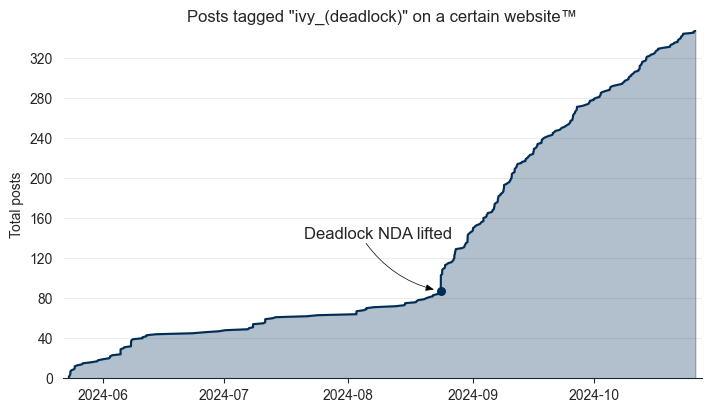

In [ ]:
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from drawarrow import ax_arrow
from highlight_text import ax_text


def find_closest_date_ind(d):
    return np.searchsorted(x, d, side="right") + 3


date_str = "23-08-2024"

dates = res_df.loc[~res_df["is_deleted"], "created_at"]

x = dates.to_numpy()
y = np.arange(1, len(x) + 1)

x_point = np.datetime64(datetime.strptime(date_str, "%d-%m-%Y"))
ind = find_closest_date_ind(x_point)

x_point = x[ind]
y_point = y[ind]

arrow_props = dict(
    color="black", width=0.5, head_width=2, head_length=5, radius=0.2, shrinkB=5
)

sns.set_style("ticks")

fig, ax = plt.subplots()

color = "#002d56"

fig.set_size_inches(7, 4)
fig.tight_layout(pad=0.8)

# fig.autofmt_xdate()

ax.set_title('Posts tagged "ivy_(deadlock)" on a certain website™')
ax.set_ylabel("Total posts")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13)))

ax.yaxis.set_major_locator(plt.MaxNLocator(nbins="auto", integer=True))
ax.tick_params(left=False)

ax.margins(y=0, x=0.01)

ax.grid(axis="y", color="0.9", linestyle="-", linewidth=0.5)

ax.set_ylim(0, max(y) + 1)
ax.plot(x, y, color=color)
ax.fill_between(x, y, alpha=0.3, color=color, zorder=10)

ax_text(
    x=19925,
    y=y_point + 65,
    s="Deadlock NDA lifted",
    fontsize=12,
    ha="left",
    va="top",
    ax=ax,
)

ax_arrow(
    tail_position=(19940, y_point + 50),
    head_position=(x_point, y_point),
    ax=ax,
    **arrow_props,
)

ax.scatter(x_point, y_point, color=color, s=30, zorder=3)

plt.savefig("ivy_graph.png", dpi=300)
plt.show()